In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [49]:
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')
products_df = pd.read_csv('Products.csv')
df = pd.merge(transactions_df, customers_df, on='CustomerID', how='inner')
df = pd.merge(df, products_df, on='ProductID', how='inner')


In [51]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
max_date = df['TransactionDate'].max()

df['Recency'] = (max_date - df['TransactionDate']).dt.days

frequency = df.groupby('CustomerID').size().reset_index(name='Frequency')

monetary = df.groupby('CustomerID')['TotalValue'].sum().reset_index(name='Monetary')

customer_summary = pd.merge(customers_df[['CustomerID', 'Region']], frequency, on='CustomerID', how='left')
customer_summary = pd.merge(customer_summary, monetary, on='CustomerID', how='left')
customer_summary = pd.merge(customer_summary, df[['CustomerID', 'Recency']].drop_duplicates(), on='CustomerID', how='left')

customer_summary.fillna(0, inplace=True)

In [53]:
scaler_choice = 'MinMaxScaler'

if scaler_choice == 'StandardScaler':
    scaler = StandardScaler()
elif scaler_choice == 'MinMaxScaler':
    scaler = MinMaxScaler()
elif scaler_choice == 'RobustScaler':
    scaler = RobustScaler()

numeric_cols = ['Recency', 'Frequency', 'Monetary']
customer_summary_scaled = customer_summary.copy()
customer_summary_scaled[numeric_cols] = scaler.fit_transform(customer_summary[numeric_cols])

In [55]:
kmeans = KMeans(n_clusters=3, init='random', n_init=20, random_state=42)
customer_summary['Cluster_KMeans'] = kmeans.fit_predict(customer_summary_scaled[numeric_cols])

kmeans_silhouette = silhouette_score(customer_summary_scaled[numeric_cols], customer_summary['Cluster_KMeans'])
kmeans_db_index = davies_bouldin_score(customer_summary_scaled[numeric_cols], customer_summary['Cluster_KMeans'])

print(f"Silhouette Score for KMeans with {scaler_choice}: {kmeans_silhouette}")
print(f"Davies-Bouldin Index for KMeans with {scaler_choice}: {kmeans_db_index}")

Silhouette Score for KMeans with MinMaxScaler: 0.35482316674026787
Davies-Bouldin Index for KMeans with MinMaxScaler: 0.9804203176653091


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


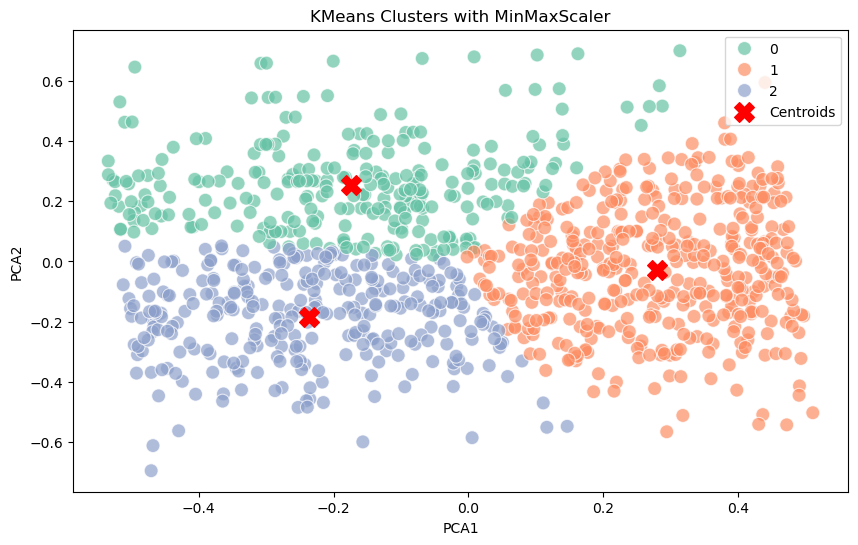

In [57]:
# Perform PCA transformation on the data for visualization
pca = PCA(n_components=2)
customer_summary_pca = customer_summary.copy()
customer_summary_pca[['PCA1', 'PCA2']] = pca.fit_transform(customer_summary_scaled[numeric_cols])

# Get the centroids of the clusters in the original feature space
centroids = kmeans.cluster_centers_

# Transform centroids to PCA space
centroids_pca = pca.transform(centroids)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_KMeans', data=customer_summary_pca, palette='Set2', s=100, alpha=0.7)

# Plot the centroids on the scatter plot
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', color='Red', s=200, label='Centroids')

# Add title and legend
plt.title(f'KMeans Clusters with {scaler_choice}')
plt.legend()
plt.show()


In [59]:
kmeans = KMeans(n_clusters=5, init='random', n_init=20, random_state=42)
customer_summary['Cluster_KMeans'] = kmeans.fit_predict(customer_summary_scaled[numeric_cols])

kmeans_silhouette = silhouette_score(customer_summary_scaled[numeric_cols], customer_summary['Cluster_KMeans'])
kmeans_db_index = davies_bouldin_score(customer_summary_scaled[numeric_cols], customer_summary['Cluster_KMeans'])

print(f"Silhouette Score for KMeans with {scaler_choice}: {kmeans_silhouette}")
print(f"Davies-Bouldin Index for KMeans with {scaler_choice}: {kmeans_db_index}")

Silhouette Score for KMeans with MinMaxScaler: 0.3112167741392157
Davies-Bouldin Index for KMeans with MinMaxScaler: 0.9702624767741055


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


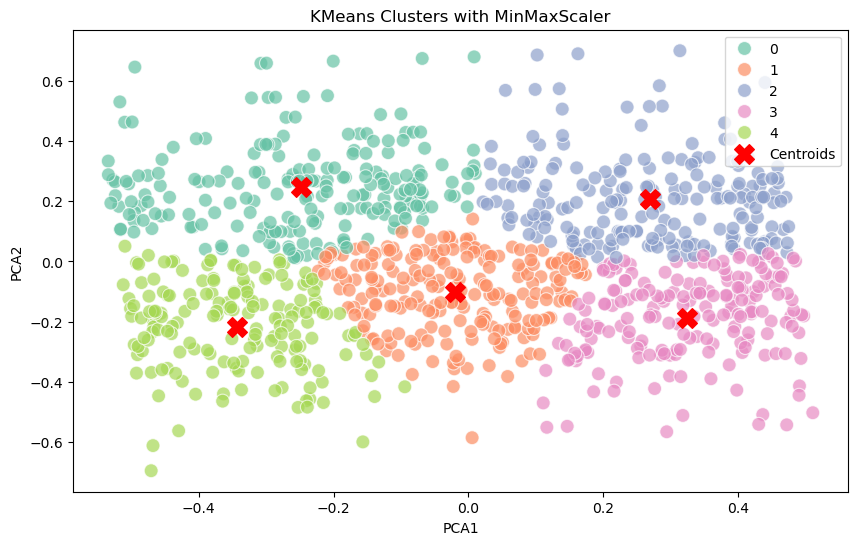

In [61]:
# Perform PCA transformation on the data for visualization
pca = PCA(n_components=2)
customer_summary_pca = customer_summary.copy()
customer_summary_pca[['PCA1', 'PCA2']] = pca.fit_transform(customer_summary_scaled[numeric_cols])

# Get the centroids of the clusters in the original feature space
centroids = kmeans.cluster_centers_

# Transform centroids to PCA space
centroids_pca = pca.transform(centroids)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_KMeans', data=customer_summary_pca, palette='Set2', s=100, alpha=0.7)

# Plot the centroids on the scatter plot
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', color='Red', s=200, label='Centroids')

# Add title and legend
plt.title(f'KMeans Clusters with {scaler_choice}')
plt.legend()
plt.show()


In [67]:
kmeans = KMeans(n_clusters=6, init='random', n_init=20, random_state=42)
customer_summary['Cluster_KMeans'] = kmeans.fit_predict(customer_summary_scaled[numeric_cols])

kmeans_silhouette = silhouette_score(customer_summary_scaled[numeric_cols], customer_summary['Cluster_KMeans'])
kmeans_db_index = davies_bouldin_score(customer_summary_scaled[numeric_cols], customer_summary['Cluster_KMeans'])

print(f"Silhouette Score for KMeans with {scaler_choice}: {kmeans_silhouette}")
print(f"Davies-Bouldin Index for KMeans with {scaler_choice}: {kmeans_db_index}")

Silhouette Score for KMeans with MinMaxScaler: 0.29728571041676105
Davies-Bouldin Index for KMeans with MinMaxScaler: 1.02282161249295
